In [26]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,   MaxPooling2D
from tensorflow.keras.layers import Dense,  Dropout, Flatten
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train,  y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape , y_train.shape

((60000, 28, 28), (60000,))

In [4]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train = np.expand_dims(x_train, -1)

In [7]:
x_train.shape

(60000, 28, 28, 1)

In [8]:
x_test = np.expand_dims(x_test, -1)
x_test.shape

(10000, 28, 28, 1)

In [9]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32') /255

In [10]:
np.max(x_train), np.min(x_train)

(1.0, 0.0)

In [11]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [12]:
def build_optim(op):
  model  = tf.keras.Sequential()
  model.add(tf.keras.layers.Conv2D(filters = 32,
                                   kernel_size = (3, 3),
                                   strides = 1,
                                   activation ='relu',
                                   input_shape = (28, 28, 1)))

  model.add(tf.keras.layers.MaxPool2D())
  model.add(tf.keras.layers.Conv2D(filters = 32,
                                   kernel_size = (3, 3),
                                   strides = 1,
                                   activation ='relu',
                                   ))

  model.add(tf.keras.layers.Dropout(0.25))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(125, activation = 'relu'))
  model.add(tf.keras.layers.Dense(256, activation = 'relu'))
  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

  model.compile(loss ='binary_crossentropy',  optimizer = op, metrics =['accuracy'])


  return model



In [13]:



optimizers = ['Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'SGD']

opt_res = []
model_res = []

for i in optimizers:
  model = build_optim(i)
  print('Accuracy:', i)
  print('\n')
  hist = model.fit(x_train, y_train, epochs = 5, batch_size = 64, validation_data = (x_test, y_test))

  model_res.append(hist)
  opt_res.append(hist.history['accuracy'])






Accuracy: Adam


Epoch 1/5
938/938 [==============================] - 15s 6ms/step - loss: 0.0427 - accuracy: 0.9288 - val_loss: 0.0095 - val_accuracy: 0.9839
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0107 - accuracy: 0.9834 - val_loss: 0.0065 - val_accuracy: 0.9884
Epoch 3/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0073 - accuracy: 0.9887 - val_loss: 0.0066 - val_accuracy: 0.9887
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0058 - accuracy: 0.9911 - val_loss: 0.0060 - val_accuracy: 0.9896
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0043 - accuracy: 0.9934 - val_loss: 0.0057 - val_accuracy: 0.9908
Accuracy: RMSprop


Epoch 1/5
938/938 [==============================] - 7s 6ms/step - loss: 0.0450 - accuracy: 0.9225 - val_loss: 0.0111 - val_accuracy: 0.9809
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0120 - accuracy: 0.9813 - val_loss: 0.008

In [24]:
optimizers

['Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'SGD']

In [31]:
adam, rmsprop, adadelta,  adagrad, sgd = opt_res

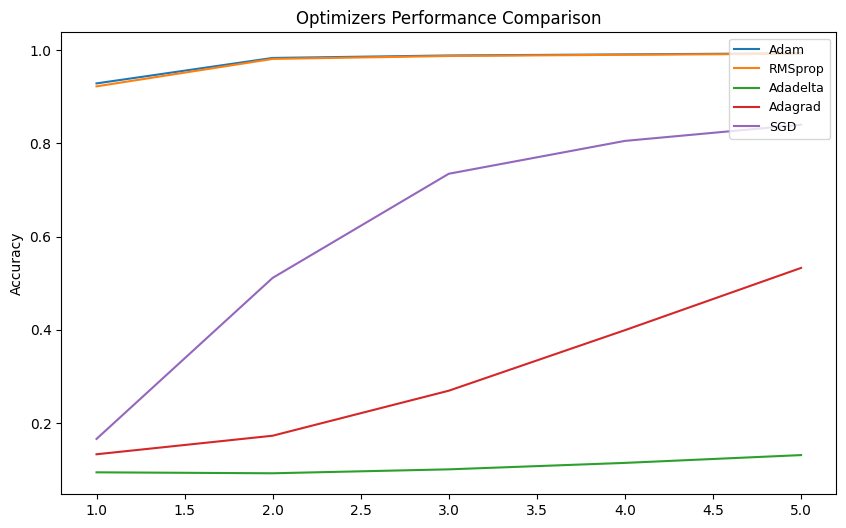

In [52]:
import matplotlib.pyplot as plt

x_values = [1, 2, 3, 4, 5]
y_values = [adam, rmsprop, adadelta, adagrad, sgd]
optimizers = ['Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'SGD']

fig, ax = plt.subplots(figsize=(10, 6))
for y in y_values:
    ax.plot(x_values, y)


plt.title('Optimizers Performance Comparison')
plt.ylabel('Accuracy')
plt.legend(optimizers, fontsize=9, loc='upper right')
plt.show()
